## The Data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import pylab
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import time

start = time.time()



In [3]:
dane = pd.read_csv('daneT800-1500K.csv', sep = ";")
array = dane.values
X = array[:,0:4]
X1 = array[:,5]

In [4]:
X

array([[8.0e+02, 2.0e-01, 2.0e+00, 3.0e+00],
       [8.0e+02, 2.0e-01, 2.0e+00, 3.0e+00],
       [8.0e+02, 2.0e-01, 2.0e+00, 3.0e+00],
       ...,
       [1.4e+03, 8.0e-01, 2.5e+01, 8.0e+00],
       [1.4e+03, 8.0e-01, 2.5e+01, 8.0e+00],
       [1.4e+03, 8.0e-01, 2.5e+01, 8.0e+00]])

In [5]:
dane.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T,77616.0,1100.000000,200.001288,800.000000,900.000000,1100.000000,1300.000000,1400.000000
VF,77616.0,0.500000,0.200001,0.200000,0.300000,0.500000,0.700000,0.800000
Tr,77616.0,13.500000,6.922231,2.000000,7.750000,13.500000,19.250000,25.000000
l_tpb,77616.0,5.500000,1.707836,3.000000,4.000000,5.500000,7.000000,8.000000
E,77616.0,0.241622,0.217229,0.029615,0.100339,0.167297,0.307292,2.174071
i,77616.0,0.150000,0.094869,0.000000,0.060000,0.150000,0.240000,0.300000
Cd,77616.0,10057.806008,20500.200018,0.000000,80.596965,1420.647118,10104.607644,306611.420013


In [6]:
x_data = dane.drop(['Cd'],axis=1)
x_data

,T,VF,Tr,l_tpb,E,i
0,800,0.2,2,3,1.087036,0.00
1,800,0.2,2,3,1.087036,0.03
2,800,0.2,2,3,1.087036,0.06
3,800,0.2,2,3,1.087036,0.09
4,800,0.2,2,3,1.087036,0.12
5,800,0.2,2,3,1.087036,0.15
6,800,0.2,2,3,1.087036,0.18
7,800,0.2,2,3,1.087036,0.21
8,800,0.2,2,3,1.087036,0.24
9,800,0.2,2,3,1.087036,0.27


In [7]:
y_val = dane[['Cd']].as_matrix()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalerx = scaler.fit(x_data)
x_data = scaler.transform(x_data)


x_data=pd.DataFrame(x_data, columns=['T','VF',  'Tr','l_tpb','E',  'i'])
x_data

,T,VF,Tr,l_tpb,E,i
0,0.0,0.0,0.0,0.0,0.493095,0.0
1,0.0,0.0,0.0,0.0,0.493095,0.1
2,0.0,0.0,0.0,0.0,0.493095,0.2
3,0.0,0.0,0.0,0.0,0.493095,0.3
4,0.0,0.0,0.0,0.0,0.493095,0.4
5,0.0,0.0,0.0,0.0,0.493095,0.5
6,0.0,0.0,0.0,0.0,0.493095,0.6
7,0.0,0.0,0.0,0.0,0.493095,0.7
8,0.0,0.0,0.0,0.0,0.493095,0.8
9,0.0,0.0,0.0,0.0,0.493095,0.9


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3,random_state=101)

In [11]:
X_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T,23285.0,0.500565,0.333921,0.0,0.166667,0.500000,0.833333,1.0
VF,23285.0,0.503436,0.333706,0.0,0.166667,0.500000,0.833333,1.0
Tr,23285.0,0.499932,0.300445,0.0,0.260870,0.478261,0.739130,1.0
l_tpb,23285.0,0.501318,0.342440,0.0,0.200000,0.600000,0.800000,1.0
E,23285.0,0.099131,0.102382,0.0,0.032877,0.063931,0.129486,1.0
i,23285.0,0.498677,0.315227,0.0,0.200000,0.500000,0.800000,1.0


In [12]:
X_test1 = X_test.as_matrix()

In [13]:
X_tst = scalerx.inverse_transform(X_test1)
X_tst = pd.DataFrame(X_tst)
X_tst.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,23285.0,1100.339274,200.352648,800.000000,900.000000,1100.000000,1300.000000,1400.000000
1,23285.0,0.502061,0.200223,0.200000,0.300000,0.500000,0.700000,0.800000
2,23285.0,13.498432,6.910238,2.000000,8.000000,13.000000,19.000000,25.000000
3,23285.0,5.506592,1.712202,3.000000,4.000000,6.000000,7.000000,8.000000
4,23285.0,0.242198,0.219553,0.029615,0.100117,0.166712,0.307292,2.174071
5,23285.0,0.149603,0.094568,0.000000,0.060000,0.150000,0.240000,0.300000


In [14]:
dane.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T,77616.0,1100.000000,200.001288,800.000000,900.000000,1100.000000,1300.000000,1400.000000
VF,77616.0,0.500000,0.200001,0.200000,0.300000,0.500000,0.700000,0.800000
Tr,77616.0,13.500000,6.922231,2.000000,7.750000,13.500000,19.250000,25.000000
l_tpb,77616.0,5.500000,1.707836,3.000000,4.000000,5.500000,7.000000,8.000000
E,77616.0,0.241622,0.217229,0.029615,0.100339,0.167297,0.307292,2.174071
i,77616.0,0.150000,0.094869,0.000000,0.060000,0.150000,0.240000,0.300000
Cd,77616.0,10057.806008,20500.200018,0.000000,80.596965,1420.647118,10104.607644,306611.420013


In [15]:
input_shape=(X_train.shape[1],)
input_shape

(6,)

In [16]:
import tensorflow as tf

In [ ]:
#przejscie na tf_feature(tf.float64 scalar): (https://www.tensorflow.org/guide/feature_columns)
T = tf.feature_column.numeric_column('T')
E = tf.feature_column.numeric_column('E')
l_tpb = tf.feature_column.numeric_column('l_tpb')
Tr = tf.feature_column.numeric_column('Tr')
i = tf.feature_column.numeric_column('i')

feat_cols = [ T, E, l_tpb, Tr, i]

In [17]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.relu,
                       input_shape=(X_train
                                .shape[1],)),
    
    keras.layers.Dense(13, activation=tf.nn.relu),
    
    keras.layers.Dense(16, activation=tf.nn.relu),
    
    keras.layers.Dense(19, activation=tf.nn.relu),
    
    keras.layers.Dense(16, activation=tf.nn.relu),
    
    keras.layers.Dense(13, activation=tf.nn.relu),
    
    
    keras.layers.Dense(1)
  ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

model = build_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 13)                143       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                323       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                221       
______________________

In [18]:
#kropka na epoch, postęp pracy lepszy nisz logging.info()
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.27, verbose=0,
                    callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

In [19]:
model = build_model()

#  callbacks to zestaw funkcji, które należy zastosować na poszczególnych etapach procedury treningowej. 
#  Możesz użyć callbacks, aby uzyskać widok stanów wewnętrznych i statystyk modelu podczas treningu.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])




....................................................................................................
....................................................................................................
............................................................................................

In [20]:
def build_model1():
    
    model1 = keras.Sequential([
    keras.layers.Dense(11, activation=tf.nn.relu,
                       input_shape=(X_train
                                .shape[1],)),
     
    keras.layers.Dense(15, activation=tf.nn.relu),
     
    keras.layers.Dense(17, activation=tf.nn.relu),
    #keras.layers.Dropout(0.1),
    keras.layers.Dense(18, activation=tf.nn.relu),
    #keras.layers.Dropout(0.5), 
    keras.layers.Dense(20, activation=tf.nn.relu),
    #keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation=tf.nn.relu),
    
    
    keras.layers.Dense(1)
  ])

    optimizer = tf.train.RMSPropOptimizer(0.001)
    model1.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model1

model1 = build_model1()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 11)                77        
_________________________________________________________________
dense_15 (Dense)             (None, 15)                180       
_________________________________________________________________
dense_16 (Dense)             (None, 17)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 18)                324       
_________________________________________________________________
dense_18 (Dense)             (None, 20)                380       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total para

In [21]:
EPOCHS = 1000
history1 = model1.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.27, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [22]:
model1 = build_model1()


early_stop1 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)

history1 = model1.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
..................................................

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.ticker as ticker

def plot_history(history):
''''
    Args:
    history(History.history):Obiekt historii. Atrybut History.history jest zapisem wartości strat szkoleniowych i wartości 
    metryk w kolejnych epokach, a także wartości utraty walidacji i wartości metryk walidacji
''''    

    
    plt.figure(facecolor='white')
    
    if history == history1 :
        nr = 2 
    else :
        nr = 1
    
  
    error = np.array(history.history['mean_absolute_error'])
    errorval = np.array(history.history['val_mean_absolute_error'])
    
  


  
    fig, ax = plt.subplots(figsize=[10, 5], facecolor='white', sharex=True)


    if nr == 1 :
        
        ax.plot(history.epoch, error, 'b--',
           label='Train Loss')
        ax.plot(history.epoch, errorval, 'g',
           label = 'Val loss')
    else:
        ax.plot(history.epoch, error, 'k--',
           label='Train Loss')
        ax.plot(history.epoch, errorval, 'r',
           label = 'Val loss')
        

  
    axins = zoomed_inset_axes(ax, 3, loc=1)
    
    if nr == 1 :
        axins.plot(history.epoch, error, 'b--')
        axins.plot(history.epoch, errorval, 'g') 
    else:
        
        axins.plot(history.epoch, error, 'k--')
        axins.plot(history.epoch, errorval, 'r') 
    
    x1, x2, y1, y2 = history.epoch[-50], history.epoch[-1], errorval[-1]-200, errorval[-1]+600
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    
    axins.tick_params(axis='both', which='major', labelsize=8, labelcolor = 'k')
    
    xticklabels = x1, (x2+x1)*0.5, x2
    yticklabels = y1, (y2+y1)/2, y2
    axins.xaxis.set_major_locator(ticker.FixedLocator(xticklabels))
    axins.yaxis.set_major_locator(ticker.FixedLocator(yticklabels))
    
    ax.legend(['Dane uczące sieć nr. %s' %nr, 'Dane walidacyjne sieć nr. %s' %nr], loc = 2, frameon= True)
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
    
    

    ax.set_xlabel('Epoch', fontsize=15)
    ax.set_ylabel('średni błąd' , fontsize=15)
    ax.grid(True)
    
    
    
    




In [45]:


def plot_porownanie(history, history1):
    
''''
    Args:
    history(History.history):Obiekt historii. Atrybut History.history jest zapisem wartości strat szkoleniowych i wartości 
    metryk w kolejnych epokach, a także wartości utraty walidacji i wartości metryk walidacji
''''    

    plt.figure(facecolor='white', figsize = [10,5])
    
  
    error = np.array(history.history['mean_absolute_error'])
    errorval = np.array(history.history['val_mean_absolute_error'])
    
    error1 = np.array(history1.history['mean_absolute_error'])
    errorval1 = np.array(history1.history['val_mean_absolute_error'])

  
    
    fig, ax = plt.subplots(figsize=[10, 5], facecolor='white', sharex=True)

    
  
    ax.plot(history.epoch, error, 'b--',
           label='Train Loss')
    ax.plot(history.epoch, errorval, 'g',
           label = 'Val loss')
    
    ax.plot(history1.epoch, error1, 'k--',
           label='Train Loss1')
    ax.plot(history1.epoch, errorval1, 'r',
           label = 'Val loss1')
  
    axins = zoomed_inset_axes(ax, 3, loc=1)
    axins.plot(history.epoch, error, 'b--')
    axins.plot(history.epoch, errorval, 'g')
    axins.plot(history1.epoch, error1, 'k--')
    axins.plot(history1.epoch, errorval1, 'r')
    
    if history.epoch > history1.epoch :
        
        x1, x2, y1, y2 = history.epoch[-50], history.epoch[-1], errorval[-1]-500, errorval[-1]+500 
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        
    else:
        x1, x2, y1, y2 = history1.epoch[-50], history1.epoch[-1], errorval1[-1]-500, errorval1[-1]+500
        axins.set_xlim(x1, x2) 
        axins.set_ylim(y1, y2)
        
    
    
    axins.tick_params(axis='both', which='both', labelsize=8, labelcolor = 'k', size = 5)
    
    
    xticklabels = x1, (x2+x1)/2, x2
    yticklabels = y1, (y2+y1)/2, y2
    axins.xaxis.set_major_locator(ticker.FixedLocator(xticklabels))
    axins.yaxis.set_major_locator(ticker.FixedLocator(yticklabels))
    
    axins.yaxis.set_visible(True)
    ax.legend(['Dane uczące sieć nr. 1', 'Dane walidacyjne sieć nr. 1'
               , 'Dane uczące sieć nr. 2', 'Dane walidacyjne sieć nr. 2'], loc = 2, frameon= True)
    mark_inset(ax, axins, loc1=3, loc2=4, lw='0.5')
    
    

    ax.set_xlabel('Epoch', fontsize=15)
    ax.set_ylabel('Średni błąd' , fontsize=15)
    ax.grid(True)
#     axins.grid(False)
    

  



In [25]:
import os
os.getcwd()


'C:\\Users\\Ola\\Desktop\\praca magisterska'

<Figure size 432x288 with 0 Axes>

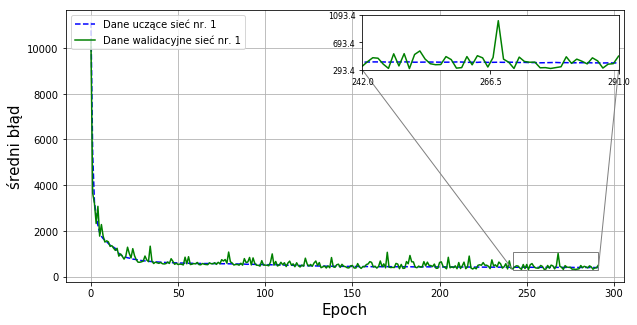

In [52]:

plot_history(history)
plt.savefig('C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/train_val_history(7)_2_11.13.png')

<Figure size 720x360 with 0 Axes>

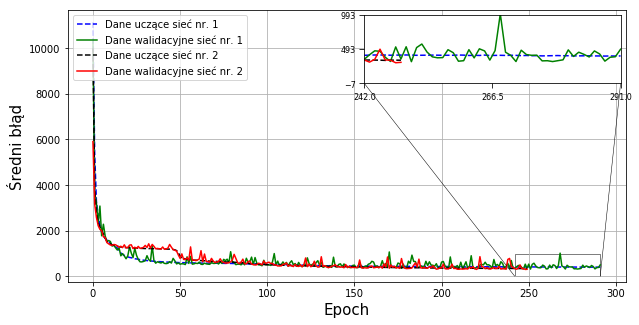

In [47]:
plot_porownanie(history, history1)
plt.savefig('C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/train_val_porownanie(7)_2_10.13_11.10.png')

In [32]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae ))

[loss, mae] = model1.evaluate(X_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae ))

Testing set Mean Abs Error:  495.54
Testing set Mean Abs Error:  295.10


In [34]:
#model
model_json = model.to_json()
with open("C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/porownanie7_2.1_10.13.json", "w") as json_file:
    json_file.write(model_json)
#wagi
model.save_weights("C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/porownanie7_2.1_10.13.h5")
print("Saved model to disk")
#model
model_json = model1.to_json()
with open("C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/porownanie7_2.2_11.10.json", "w") as json_file:
    json_file.write(model_json)
#wagi
model.save_weights("C:\\Users\\Ola\\Desktop\\praca magisterska\\wykresy/porownanie7_2.2_11.10.h5")
print("Saved model to disk")

Saved model to disk
Saved model to disk


In [35]:
test_predictions = model.predict(X_test).flatten()
test_predictions1 = model1.predict(X_test).flatten()

In [36]:
from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(y_test,test_predictions)**0.5
MSE2 = mean_squared_error(y_test,test_predictions1)**0.5

print ('MSE1 = %s, MSE2 =%s' %(MSE1, MSE2))

MSE1 = 678.4480761502452, MSE2 =660.0408409177361


In [37]:
from sklearn.metrics import r2_score
r1 = r2_score(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions1)
print ('r1 = %s, r2 =%s' %(r1, r2))

r1 = 0.9989340862991715, r2 =0.9989911410950244


In [38]:
end = time.time()
print(end - start)

7129.439536333084


In [ ]:
import json
from pprint import pprint
from keras.models import model_from_json

json_file = open('modelVF1.2.7.1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("modelVF1.2.7.1.h5")
print("Loaded model from disk")
optimizer = tf.train.RMSPropOptimizer(0.001)

loaded_model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])


                     
[loss, mae] = loaded_model.evaluate(X_test.values, y_test, verbose=0)

print("Testing set Mean Abs Error: {:7.2f}".format(mae ))



## PEŁNE DANE
